## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from pathlib import Path

import matplotlib.pyplot as plt

from lung_cancer_detection.data.nodule import ClassificationDataModule
from lung_cancer_detection.utils import load_config, load_json

In [3]:
config_path = Path().absolute().parents[0] / "configs/test.yaml"
config_path.exists()

True

In [4]:
config = load_config(config_path)
data_dir = Path().absolute().parents[0] / config["data"]["data_dir"]
split_dir = Path().absolute().parents[0] / config["data"]["split_dir"]
cache_dir = Path().absolute().parents[0] / config["data"]["cache_dir"]

In [5]:
splits = (load_json(split_dir/"train.json"), load_json(split_dir/"valid.json"))

## Helper functions

In [6]:
def print_shapes(dataset):
    for item in dataset:
        print(item["image"].shape, item["label"].shape)

In [7]:
def preview_dataset(ds, z=None):
    plt.figure("nodules", (12, 12))
    for i, item in enumerate(ds[:20], start=1):
        img = item["image"].numpy()[0]
        plt.subplot(4, 5, i)
        if z:
            plt.imshow(img[:,:,z], cmap="gray")
        else:
            plt.imshow(img[:,:,int(img.shape[2]/2)], cmap="gray")
        plt.title(f"Label: {item['label'].numpy()[0]}")
    plt.show()

## Inititalize DataModule

In [8]:
dm = ClassificationDataModule(data_dir, cache_dir, splits, batch_size=2)

In [9]:
dm.setup()

In [10]:
print_shapes(dm.train_ds)

torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])


In [11]:
print_shapes(dm.val_ds)

torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])
torch.Size([1, 40, 40, 30]) torch.Size([1])


In [12]:
elem = dm.train_ds[0]
for key in elem:
    print(key, type(elem[key]))

image <class 'torch.Tensor'>
label <class 'torch.Tensor'>


In [14]:
from monai.data.utils import list_data_collate

In [22]:
dl = dm.train_dataloader()
for batch in dl:
    print(batch["image"].shape, batch["label"].shape)

torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])


In [23]:
dl = dm.val_dataloader()
for batch in dl:
    print(batch["image"].shape, batch["label"].shape)

torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([2, 1, 40, 40, 30]) torch.Size([2, 1])
torch.Size([1, 1, 40, 40, 30]) torch.Size([1, 1])


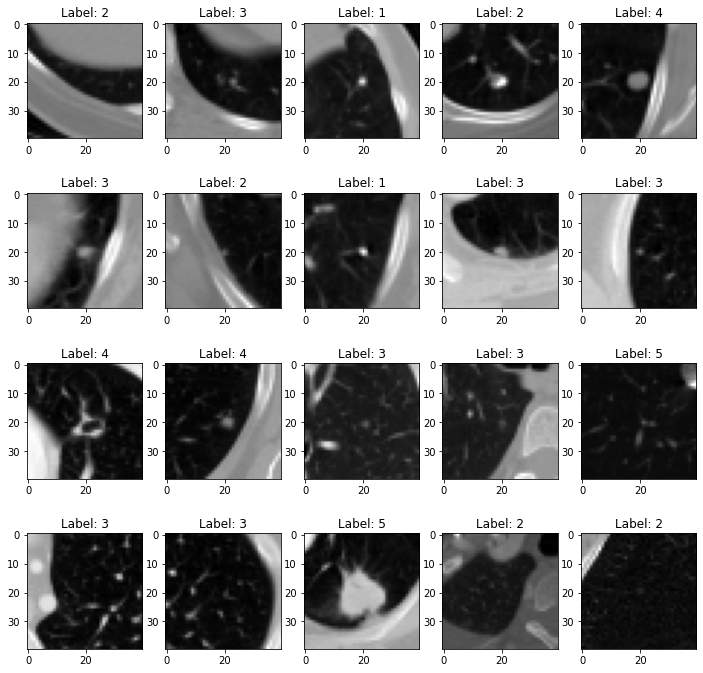

In [20]:
preview_dataset(dm.train_ds)

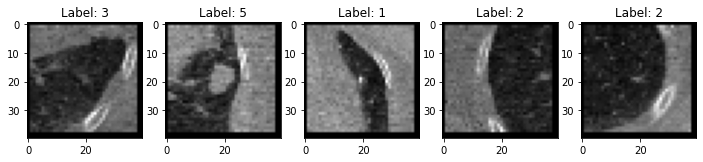

In [21]:
preview_dataset(dm.val_ds)